TASK:-
1. image resizing for vgg16
2. pixel value normalization 
3. data augementaion 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Matplotlib is building the font cache; this may take a moment.


In [3]:

# Augmentation & preprocessing for train
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixels 0-1
    rotation_range=15,       # Small rotations
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# No augmentation for test, only rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    "../dataset/Training",
    target_size=(224, 224),  # THIS is the resize
    color_mode="rgb",        # Converts grayscale to RGB automatically
    class_mode="categorical",
    batch_size=32,
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    "../dataset/Testing",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


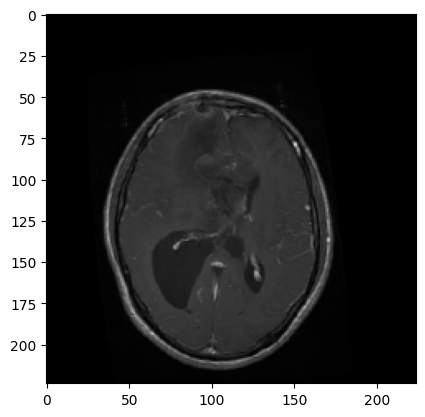

Shape: (4,)


In [5]:
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_generator)

plt.imshow(x_batch[0])
plt.show()
print("Shape:", x_batch[0].shape)  # should be (224, 224, 3)
